In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

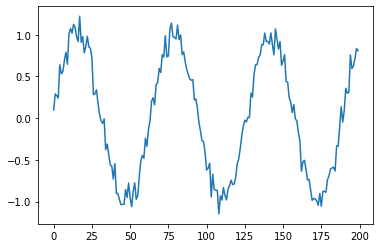

In [2]:
# create synthetic data
series = np.sin(0.1*np.arange(200)) + (0.1*np.random.randn(200))

# visualize the data
plt.plot(series)
plt.show()

In [3]:
# Window
T = 10
D = 1
# length of the data
n = len(series)

In [12]:
X = []
y = []

for t in range(0, n - T):
    x_t = series[t:t+T]
    y_t = series[t+T]
    X.append(x_t)
    y.append(y_t)

X = np.expand_dims(np.array(X), -1)
y = np.array(y)

In [29]:
half_split = len(y) // 2

X_train, X_test = X[:-half_split], X[-half_split:]
y_train, y_test = y[:-half_split], y[-half_split:]

In [30]:
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

X.shape: (190, 10, 1), y.shape: (190,)


In [31]:
i = tf.keras.layers.Input(shape=(T, 1))
x = tf.keras.layers.SimpleRNN(5, activation='relu') (i)
x = tf.keras.layers.Dense(1) (x)

model = tf.keras.models.Model(i, x)

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
)

In [32]:
fit_object = model.fit(
    X_train, y_train,
    epochs=80,
    validation_data=(X_test, y_test)
)

Epoch 1/80
3/3 [==============================] - 1s 124ms/step - loss: 4.5761 - val_loss: 0.3289
Epoch 2/80
3/3 [==============================] - 0s 26ms/step - loss: 0.4609 - val_loss: 0.3086
Epoch 3/80
3/3 [==============================] - 0s 27ms/step - loss: 0.4473 - val_loss: 0.2369
Epoch 4/80
3/3 [==============================] - 0s 28ms/step - loss: 0.3816 - val_loss: 0.1703
Epoch 5/80
3/3 [==============================] - 0s 26ms/step - loss: 0.2419 - val_loss: 0.1390
Epoch 6/80
3/3 [==============================] - 0s 27ms/step - loss: 0.2060 - val_loss: 0.1003
Epoch 7/80
3/3 [==============================] - 0s 28ms/step - loss: 0.1624 - val_loss: 0.0869
Epoch 8/80
3/3 [==============================] - 0s 26ms/step - loss: 0.1090 - val_loss: 0.0420
Epoch 9/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0705 - val_loss: 0.0308
Epoch 10/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0504 - val_loss: 0.0323
Epoch 11/80
3/3 [===========

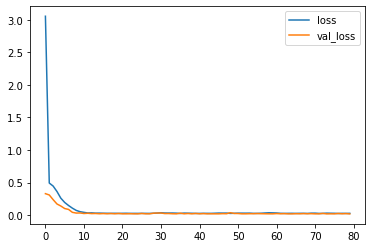

In [33]:
plt.plot(fit_object.history['loss'], label='loss')
plt.plot(fit_object.history['val_loss'], label='val_loss')
plt.legend()

In [42]:
X_test[-1].reshape(1,-1, 1).shape

(1, 10, 1)

In [41]:
X_test.shape

(95, 10, 1)

In [43]:
# !TODO take a closer look at this code
# it works but I'm not sure why
validation_target = y_test
validation_predictions = []

i = -half_split

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0]
    i += 1

    validation_predictions.append(p)

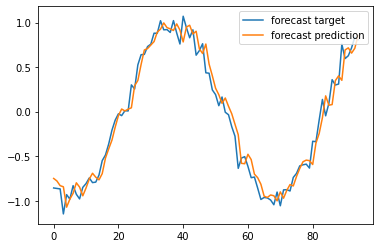

In [44]:
# differences between target and prediction
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# create the model: input, SimpleRNN (act=None), Dense
# compile the model with mse and adam(lr=0.1) epochs=80
# Fit the model to the train data, validate on test data
# Forecast and see how it looks 